In [176]:
#NGO-FUND RAISING ATTRITION

In [177]:
#Importing the required modules
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder,Imputer,StandardScaler
from sklearn.linear_model import LogisticRegression
import datetime
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import RFE
import xgboost
%matplotlib inline

In [178]:
data1=pd.read_sas('Data/payhistory.sas7bdat')
data1.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'


In [179]:
data1.iloc[:,3]=data1.iloc[:,3].str.decode("utf-8")

In [180]:
data1.iloc[:,4]=data1.iloc[:,4].str.decode("utf-8")

In [181]:
data1.iloc[:,5]=data1.iloc[:,5].str.decode("utf-8")

In [182]:
data1.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [183]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205720 entries, 0 to 1205719
Data columns (total 6 columns):
PID          1205720 non-null float64
PDATE        1205720 non-null datetime64[ns]
PAMT         1205720 non-null float64
EXTRELNO     1205720 non-null object
PAYTYPECD    1187546 non-null object
STATUS       1205719 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 55.2+ MB


In [184]:
data1.describe()

,PID,PAMT
count,1.205720e+06,1.205720e+06
mean,2.655267e+06,2.579925e+01
std,1.480799e+06,3.725114e+01
min,3.800000e+01,-2.436960e+03
25%,1.377468e+06,2.033000e+01
50%,2.709602e+06,2.033000e+01
75%,3.946880e+06,2.300000e+01
max,5.101978e+06,2.436960e+03


In [185]:
data2=pd.read_sas("Data/comclas.sas7bdat")
data2.head()

,CLASCODE,CLASDESC
0,b'CT',b'CTS-item'
1,b'RI',b'Request for information'
2,b'CM',b'Complaint'
3,b'TA',b'Threath / Accusation'
4,b'AK',b'Acknowledgement'


In [186]:
for i in data2.columns:
    data2[i]=data2[i].str.decode("utf-8")

In [187]:
data2.head()

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement


In [188]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
CLASCODE    8 non-null object
CLASDESC    8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


In [189]:
data2.describe()

,CLASCODE,CLASDESC
count,8,8
unique,8,8
top,RI,Reminder
freq,1,1


In [190]:
data3=pd.read_sas("Data/commaint.sas7bdat")
data3.head()

,MNTOPCODE,MNTOPDESC
0,b'CAN',b'Cancellations/replacements'
1,b'DIS',b'Discontinuations'
2,b'MKT',b'Marketing - Enquiries'
3,b'GEN',b'General'
4,b'NEW',b'New relations'


In [191]:
for i in data3.columns:
    data3[i]=data3[i].str.decode("utf-8")

In [192]:
data3.head()

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations


In [193]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
MNTOPCODE    30 non-null object
MNTOPDESC    30 non-null object
dtypes: object(2)
memory usage: 560.0+ bytes


In [194]:
data3.describe()

,MNTOPCODE,MNTOPDESC
count,30,30
unique,30,29
top,ARR,General
freq,1,2


In [195]:
data4=pd.read_sas("Data/commediu.sas7bdat")
data4.head()

,MEDIUMCODE,MEDIUMDESC
0,b'FF',b'Face to Face contact'
1,b'FX',b'Fax'
2,b'TX',b'Telex'
3,b'EM',b'Electronic Mail'
4,b'TE',b'Telephone call'


In [196]:
for i in data4.columns:
    data4[i]=data4[i].str.decode("utf-8")

In [197]:
data4.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


In [198]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
MEDIUMCODE    16 non-null object
MEDIUMDESC    16 non-null object
dtypes: object(2)
memory usage: 336.0+ bytes


In [199]:
data4.describe()

,MEDIUMCODE,MEDIUMDESC
count,16,16
unique,16,16
top,AF,Face to Face contact
freq,1,1


In [200]:
data5=pd.read_sas("Data/communication.sas7bdat")
data5.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28


In [201]:
for i in range(6):
    data5.iloc[:,i]=data5.iloc[:,i].str.decode("utf-8")

In [202]:
data5.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


In [203]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763569 entries, 0 to 763568
Data columns (total 7 columns):
CONTID        763569 non-null object
MEDIUMCODE    763569 non-null object
MNTOPCODE     763569 non-null object
CLASCODE      763569 non-null object
EXTRELNO      763569 non-null object
CONTDIREC     763569 non-null object
CONTDATE      763569 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 40.8+ MB


In [204]:
data5.describe()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
count,763569,763569,763569,763569,763569,763569,763569
unique,763328,15,24,9,21932,2,3290
top,005060322,CI,CTS,CT,0181194,O,2001-11-20 00:00:00
freq,2,446595,453839,459032,1008,733423,10760
first,NaN,NaN,NaN,NaN,NaN,NaN,1993-11-02 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-25 00:00:00


In [205]:
data6=pd.read_sas("Data/extrel.sas7bdat")
data6.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


In [206]:
for i in range(2):
    data6.iloc[:,i]=data6.iloc[:,i].str.decode("utf-8")

In [207]:
data6.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


In [208]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26689 entries, 0 to 26688
Data columns (total 4 columns):
EXTRELNO      26689 non-null object
EXRELACTCD    26689 non-null object
EXTRELSTDT    26689 non-null datetime64[ns]
EXRELDATEN    10168 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 834.1+ KB


In [209]:
data6.describe()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
count,26689,26689,26689,10168
unique,18704,17,2877,2567
top,0038595,FP,1994-11-29 00:00:00,1994-12-07 00:00:00
freq,6,11442,1039,58
first,NaN,NaN,1989-11-01 00:00:00,1927-10-31 00:00:00
last,NaN,NaN,2007-02-01 00:00:00,2007-01-25 00:00:00


In [210]:
data7=pd.read_sas("Data/extrelty.sas7bdat")
data7.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [211]:
for i in range(2):
    data7.iloc[:,i]=data7.iloc[:,i].str.decode("utf-8")

In [212]:
data7.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


In [213]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
EXRELACTCD    26 non-null object
EXRELACTDE    26 non-null object
dtypes: object(2)
memory usage: 496.0+ bytes


In [214]:
data7.describe()

,EXRELACTCD,EXRELACTDE
count,26,26
unique,26,26
top,PV,Board Member
freq,1,1


In [215]:
data8=pd.read_sas("Data/nameaddr.sas7bdat")
data8.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'


In [216]:
for i in range(4):
    data8.iloc[:,i]=data8.iloc[:,i].str.decode("utf-8")

In [217]:
data8.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [218]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24186 entries, 0 to 24185
Data columns (total 4 columns):
EXTRELNO      24186 non-null object
NAME1TITLE    23593 non-null object
POSTCODE      24034 non-null object
LANGUACODE    24186 non-null object
dtypes: object(4)
memory usage: 755.9+ KB


In [219]:
data8.describe()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
count,24186,23593,24034,24186
unique,24186,7,1080,3
top,0175637,MW,9000,NL
freq,1,7666,525,21437


In [220]:
data1.sort_values('PDATE',inplace=True)
data1a=data1[data1.PDATE<=pd.Timestamp(2005,12,3)]

In [221]:
data5.sort_values('CONTDATE',inplace=True)
data5a=data5[data5.CONTDATE<=pd.Timestamp(2005,12,3)]

In [222]:
data6.sort_values('EXRELDATEN',inplace=True)
data6a=data6[data6.EXRELDATEN<=pd.Timestamp(2005,12,3)]

In [223]:
donors=(data5a['EXTRELNO'].unique())

In [224]:
#Extracting our independent variables
indvars=(data5a['EXTRELNO'].value_counts()).to_frame()

In [225]:
#Extracting Frequency
indvars.index.names = ['EXTRELNO']
indvars.rename(index={None:'EXTRELNO'},columns={'EXTRELNO':'Frequency'},inplace=True)

In [226]:
#Extracting recency
data5a['recency']=pd.Timestamp(2005,12,3)-data5a['CONTDATE']

In [227]:
indvars['recency']=data5a.groupby('EXTRELNO').recency.min()
indvars['sum']=data1a.groupby('EXTRELNO').PAMT.sum()
indvars['avg']=data1a.groupby('EXTRELNO').PAMT.mean()

In [228]:
indvars.head()

,Frequency,recency,sum,avg
EXTRELNO,,,,
0181194,760,11 days,7412.56,23.020373
0001773,545,10 days,52168.79,20.259724
0025455,476,10 days,28243.57,110.759098
0035750,435,12 days,14648.45,57.899012
0035231,373,40 days,27620.49,20.160942


In [229]:
a=data1a
a.index=data1a.EXTRELNO

In [230]:
b=a['PAYTYPECD'].to_frame()

In [231]:
c=pd.DataFrame()

In [232]:
curval=pd.get_dummies(b['PAYTYPECD'],prefix='PAYTYPECD')
curval.loc['0000020'].sum()

PAYTYPECD_D    139
PAYTYPECD_E      0
PAYTYPECD_O      0
PAYTYPECD_X      3
dtype: int64

In [233]:
pay_type=curval.groupby('EXTRELNO').sum()

In [234]:
indvars=indvars.join(pay_type)

In [235]:
data8.index=data8['EXTRELNO']

In [236]:
indvars.join(data8['LANGUACODE'])

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,LANGUACODE
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,NL
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,NL
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,NL
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,NL
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,NL
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,NL
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,NL
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,NL
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,NL


In [237]:
compdata=data5a[data5a.CLASCODE=='CM']

In [238]:
compdata.index=compdata['EXTRELNO']

In [239]:
a=indvars
a=a.join(compdata['CLASCODE'])

In [240]:
curvala=pd.get_dummies(a['CLASCODE'],prefix='CLASCODE')

In [241]:
#groupby index
curvala=curvala.groupby(curvala.index).sum()
indvars=indvars.join(curvala)

In [242]:
inco_com_data=data5a[data5a.CONTDIREC=='I']
inco_com_data.index=inco_com_data['EXTRELNO']

a=indvars
a=a.join(inco_com_data['CONTDIREC'])
curvala=pd.get_dummies(a['CONTDIREC'],prefix='CONTDIREC')
curvala.index.unique()

Index(['0000020', '0000035', '0000042', '0000043', '0000060', '0000072',
       '0000081', '0000089', '0000091', '0000100',
       ...
       '0240664', '0240678', '0240679', '0240684', '0240685', '0240689',
       '0240696', '0240698', '0240700', '0240752'],
      dtype='object', name='EXTRELNO', length=21306)

In [243]:
indvars.isnull().sum()

Frequency         0
recency           0
sum            6393
avg            6393
PAYTYPECD_D    6393
PAYTYPECD_E    6393
PAYTYPECD_O    6393
PAYTYPECD_X    6393
CLASCODE_CM       0
dtype: int64

In [244]:
indvars['PAYTYPECD_X'].fillna(value=1,inplace=True)
indvars['PAYTYPECD_O'].fillna(value=0,inplace=True)
indvars['PAYTYPECD_D'].fillna(value=0,inplace=True)
indvars['PAYTYPECD_E'].fillna(value=0,inplace=True)

In [245]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars[['avg']])
indvars['avg'] = mean.transform(indvars[['avg']])

In [246]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars[['sum']])
indvars['sum'] = mean.transform(indvars[['sum']])

In [247]:
indvars.isnull().sum()

Frequency      0
recency        0
sum            0
avg            0
PAYTYPECD_D    0
PAYTYPECD_E    0
PAYTYPECD_O    0
PAYTYPECD_X    0
CLASCODE_CM    0
dtype: int64

In [248]:
data6a.index=data6a['EXTRELNO']
indvars.drop(data6a.index,errors='ignore',inplace=True)

In [249]:
#Extracting the dependent variables

In [250]:
depvars=data6[((data6['EXRELDATEN']>=pd.Timestamp(2006,1,1)) & (data6['EXRELDATEN']<=pd.Timestamp(2006,12,31))) | (data6['EXRELDATEN'].isnull()==True)]

In [251]:
depvars.index=depvars['EXTRELNO']

In [252]:
depvars=depvars[depvars['EXTRELSTDT']<pd.Timestamp(2006,1,1)]

In [253]:
tempC=depvars[depvars['EXRELDATEN'].isnull()==False]

In [254]:
depvars2=pd.DataFrame(index=indvars.index)

In [255]:
tempC['EXRELDATEN']=1

In [256]:
depvars2=depvars2.join(tempC['EXRELDATEN'])
depvars2.fillna(value=0,inplace=True)

In [257]:
depvars2['EXTRELNO']=depvars2.index

In [258]:
depvars2.drop_duplicates(subset='EXTRELNO',inplace=True)

In [259]:
depvars2.head()

,EXRELDATEN,EXTRELNO
EXTRELNO,,
0000020,0.0,0000020
0000035,0.0,0000035
0000042,0.0,0000042
0000043,0.0,0000043
0000060,0.0,0000060


In [260]:
depvars2.drop('EXTRELNO',axis=1,inplace=True)

In [261]:
a=pd.Series(index=indvars.index)
for i in range(len(indvars['recency'])):
    a[i]=indvars['recency'][i].days

In [262]:
indvars['recency']=a

In [263]:
#Exploring Data

In [264]:
indvars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13843 entries, 0001773 to 0188850
Data columns (total 9 columns):
Frequency      13843 non-null int64
recency        13843 non-null float64
sum            13843 non-null float64
avg            13843 non-null float64
PAYTYPECD_D    13843 non-null float64
PAYTYPECD_E    13843 non-null float64
PAYTYPECD_O    13843 non-null float64
PAYTYPECD_X    13843 non-null float64
CLASCODE_CM    13843 non-null uint8
dtypes: float64(7), int64(1), uint8(1)
memory usage: 1.6+ MB


In [265]:
indvars.describe()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
count,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000
mean,30.471357,1443.940331,2052.044434,38.563599,37.488622,0.875966,10.255725,1.558333,0.079607
std,35.446168,1560.562357,1111.473332,30.874239,63.694098,4.378611,32.920834,1.345406,0.393220
min,1.000000,1.000000,-276.000000,-138.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,102.000000,1863.360956,19.922908,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,470.000000,1863.360956,39.434505,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,3006.000000,2782.690000,39.434505,57.000000,0.000000,0.000000,2.000000,0.000000
max,545.000000,4414.000000,52168.790000,360.000000,2463.000000,137.000000,829.000000,28.000000,6.000000


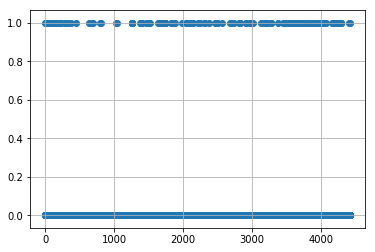

In [266]:
plt.scatter(indvars['recency'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

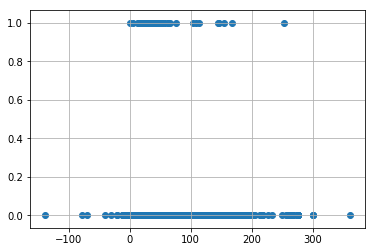

In [267]:
plt.scatter(indvars['avg'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

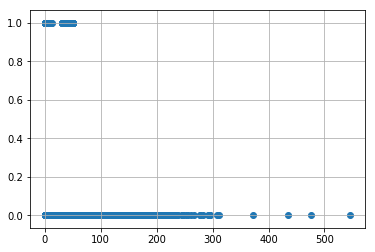

In [268]:
plt.scatter(indvars['Frequency'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

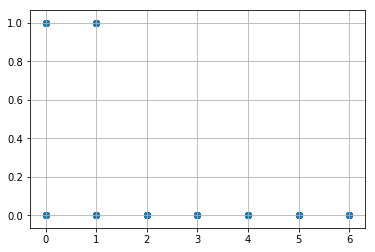

In [269]:
plt.scatter(indvars['CLASCODE_CM'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

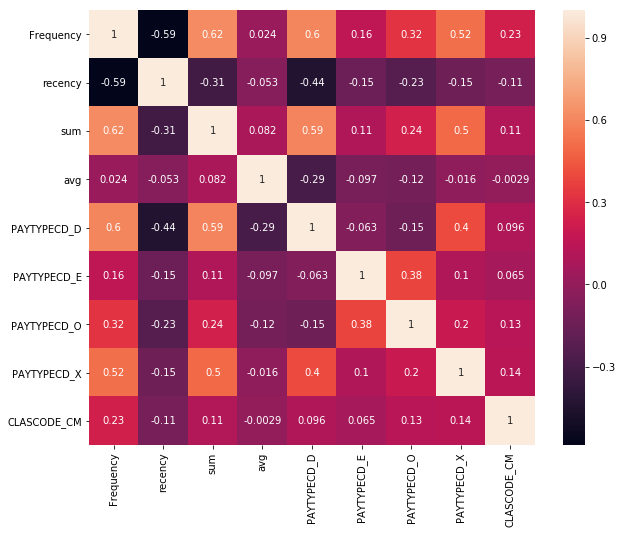

In [270]:
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(indvars.corr(), annot=True)
plt.show()

In [271]:
churned=depvars2[depvars2.EXRELDATEN==1]

In [272]:
active=depvars2.drop(churned.index,axis=0)

In [273]:
combo=pd.concat([active,churned])

In [274]:
subs=indvars.index.difference(combo.index)

In [275]:
indvars.drop(subs,axis=0,inplace=True)

In [276]:
a=indvars
indvars.head()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0001773,545,10.0,52168.79,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10.0,28243.57,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12.0,14648.45,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40.0,27620.49,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162.0,5687.19,15.005778,0.0,7.0,361.0,9.0,0


In [277]:
#Modeling

In [278]:
x_train, x_test, y_train, y_test= train_test_split(indvars,combo,test_size=0.2,random_state=0)

In [279]:
names=[
    "Nearest Neighbors", 
    "Linear SVM", 
    "RBF SVM", 
    "Decision Tree",
    "Gaussian Process",
    "Random Forest", 
    "AdaBoost",
    "Neural Net",
    "Naive Bayes", 
    "Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis",
    "Logistic Regression"
    ]

classifiers=[
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma='auto', C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianProcessClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=500),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
    ]

In [280]:
for i,j in zip(names,classifiers):
    j.fit(x_train,y_train)
    
    score = j.score(x_test,y_test)
    ypred=j.predict(x_test)    
    cv_acc=cross_val_score(estimator=j,X=x_train,y=y_train,cv=5)
    cm=confusion_matrix(y_test,ypred)
    cv_acc=cv_acc.mean()
    acc=accuracy_score(y_test,ypred)
    f1=f1_score(y_test,ypred,average='binary')
    auc = roc_auc_score(y_test,ypred)
    aps=average_precision_score(y_test,ypred)   
        
    print("+"*80)
    print("\n Classifier is \n" + str(i))
    print("\n Score \n" + str(score*100) + "%")
    print('\n Confusion Matrix \n',cm)
    print('\n Cross Validation Score \n',cv_acc)
    print('\n Testing Accuracy \n',acc)
    print('\n F1 Score \n',f1)
    print('\n AUC \n',auc)
    print('\n Average Precision Score \n',aps)
    print(j.get_params)
    
    if i=="Random Forest":
        feature_importances=pd.DataFrame(j.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
        print(feature_importances)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Nearest Neighbors

 Score 
98.48320693391116%

 Confusion Matrix 
 [[2726    0]
 [  42    1]]

 Cross Validation Score 
 0.9804949811315173

 Testing Accuracy 
 0.9848320693391116

 F1 Score 
 0.04545454545454545

 AUC 
 0.5116279069767442

 Average Precision Score 
 0.03842374461437678
<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Linear SVM

 Score 
98.44709281329%

 Confusion Matrix 
 [[2726    0]
 [  43    0]]

 Cross Validation Score 
 0.981127076053733

 Testing Accuracy 
 0.9844709281328999

 F1 Score 
 0.0

 AUC 
 0.5

 Average Precision Score 
 0.015529071867100036
<bound method BaseEstimator.get_params of SVC(C=0.025, cache_s

In [281]:
#Saving the Random Forest Model as it is best possible model

In [282]:
#According to the mentioned importance, we can reduce the number of features to make the model better. Here, we remove features that have no or very little impact with regard to the model.

In [283]:
indvars=indvars[["Frequency","recency"]]

In [284]:
#Re-Modeling
x_train,x_test,y_train,y_test=train_test_split(indvars,combo,test_size=0.2,random_state=0)

In [285]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print("\n Score \n" + str(score*100) + "%")
print(feature_importances)


 Score 
98.23040808956301%
           importance
recency      0.875607
Frequency    0.124393


In [286]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfe = RFE(rf, n_features_to_select=5)
rfe = rfe.fit(x_train, y_train)

In [287]:
y_pred=rfe.predict(x_test)

In [288]:
y_pred=pd.DataFrame(data=y_pred,index=x_test.index)

In [289]:
filename = 'random_forest_model.sav'
pickle.dump(rfe, open(filename, 'wb'))

In [290]:
#Validation

In [291]:
data1b=data1[((data1['PDATE']>=pd.Timestamp(2006,1,1)) & (data1['PDATE']<=pd.Timestamp(2006,12,31)))]

In [292]:
data5b=data5[((data5['CONTDATE']>=pd.Timestamp(2006,1,1)) & (data5['CONTDATE']<=pd.Timestamp(2006,12,31)))]

In [293]:
data6b=data6[((data6['EXRELDATEN']>=pd.Timestamp(2006,1,1)) & (data6['EXRELDATEN']<=pd.Timestamp(2006,12,31)))]

In [294]:
donors=(data5b['EXTRELNO'].unique())

In [295]:
indvars2=(data5b['EXTRELNO'].value_counts()).to_frame()

In [296]:
indvars2.index.names = ['EXTRELNO']
indvars2.rename(index={None:'EXTRELNO'},columns={'EXTRELNO':'Frequency'},inplace=True)

In [297]:
data5b['recency']=pd.Timestamp(2007,2,2)-data5b['CONTDATE']

In [298]:
indvars2['recency']=data5b.groupby('EXTRELNO').recency.min()
indvars2['sum']=data1b.groupby('EXTRELNO').PAMT.sum()
indvars2['avg']=data1b.groupby('EXTRELNO').PAMT.mean()

In [299]:
a=data1b
a.index=data1b.EXTRELNO
b=a['PAYTYPECD'].to_frame()

In [300]:
curvalb=pd.get_dummies(b['PAYTYPECD'],prefix='PAYTYPECD')

In [301]:
paytypeb=curvalb.groupby('EXTRELNO').sum()

In [302]:
indvars2=indvars2.join(paytypeb)

In [303]:
data8.index=data8['EXTRELNO']

In [304]:
indvars2.join(data8['LANGUACODE'])
indvars2.head()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O
EXTRELNO,,,,,,,
0181194,201,38 days,3841.0,98.487179,39.0,0.0,0.0
0221225,63,52 days,276.0,23.000000,12.0,0.0,0.0
0223508,61,35 days,276.0,69.000000,0.0,4.0,0.0
0232989,59,59 days,276.0,23.000000,12.0,0.0,0.0
0235715,50,63 days,276.0,23.000000,0.0,12.0,0.0


In [305]:
complaints=data5b[data5b.CLASCODE=='CM']

In [306]:
complaints.index=complaints['EXTRELNO']

In [307]:
a=indvars2
a=a.join(complaints['CLASCODE'])

In [308]:
curvalb=pd.get_dummies(a['CLASCODE'],prefix='CLASCODE')

In [309]:
#groupby index
curvalb=curvalb.groupby(curvalb.index).sum()

In [310]:
indvars2=indvars2.join(curvalb)

In [311]:
indvars2.head()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,CLASCODE_CM
EXTRELNO,,,,,,,,
0181194,201,38 days,3841.0,98.487179,39.0,0.0,0.0,0
0221225,63,52 days,276.0,23.000000,12.0,0.0,0.0,0
0223508,61,35 days,276.0,69.000000,0.0,4.0,0.0,0
0232989,59,59 days,276.0,23.000000,12.0,0.0,0.0,0
0235715,50,63 days,276.0,23.000000,0.0,12.0,0.0,0


In [312]:
inco=data5b[data5b.CONTDIREC=='I']

In [313]:
inco.index=inco['EXTRELNO']

In [314]:
a=indvars2
a=a.join(inco['CONTDIREC'])
curvalb=pd.get_dummies(a['CONTDIREC'],prefix='CONTDIREC')

In [315]:
curvalb.index.unique()

Index(['0000020', '0000035', '0000072', '0000081', '0000089', '0000100',
       '0000105', '0000109', '0000113', '0000114',
       ...
       '0244678', '0244687', '0244698', '0244704', '0244715', '0244728',
       '0244730', '0244733', '0244735', '0244736'],
      dtype='object', name='EXTRELNO', length=10921)

In [316]:
indvars2.isnull().sum().sort_values(ascending=False)

PAYTYPECD_O    810
PAYTYPECD_E    810
PAYTYPECD_D    810
avg            810
sum            810
CLASCODE_CM      0
recency          0
Frequency        0
dtype: int64

In [317]:
a=indvars2[(indvars2['PAYTYPECD_O'].isnull()==True) | (indvars2['PAYTYPECD_E'].isnull()==True) | (indvars2['PAYTYPECD_D'].isnull()==True)]
PAYTYPECD_X=pd.Series(index=a.index,name='PAYTYPECD_X')

In [318]:
PAYTYPECD_X.fillna(1,inplace=True)
indvars2=indvars2.join(PAYTYPECD_X)

In [319]:
indvars2['PAYTYPECD_O'].fillna(value=0,inplace=True)
indvars2['PAYTYPECD_D'].fillna(value=0,inplace=True)
indvars2['PAYTYPECD_E'].fillna(value=0,inplace=True)
indvars2['PAYTYPECD_X'].fillna(value=0,inplace=True)

In [320]:
indvars2.isnull().sum().sort_values(ascending=False)

avg            810
sum            810
PAYTYPECD_X      0
CLASCODE_CM      0
PAYTYPECD_O      0
PAYTYPECD_E      0
PAYTYPECD_D      0
recency          0
Frequency        0
dtype: int64

In [321]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars2[['avg']])
indvars2['avg'] = mean.transform(indvars2[['avg']])

In [322]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars2[['sum']])
indvars2['sum'] = mean.transform(indvars2[['sum']])

In [323]:
indvars2.isnull().sum().sort_values(ascending=False)

PAYTYPECD_X    0
CLASCODE_CM    0
PAYTYPECD_O    0
PAYTYPECD_E    0
PAYTYPECD_D    0
avg            0
sum            0
recency        0
Frequency      0
dtype: int64

In [324]:
data6b.index=data6b['EXTRELNO']
indvars2.drop(data6b.index,errors='ignore',inplace=True)

In [325]:
s=pd.Series(index=indvars2.index)
for i in range(len(indvars2['recency'])):
    s[i]=indvars2['recency'][i].days

In [326]:
indvars2['recency']=s

In [327]:
depvars2=data6[((data6['EXRELDATEN']>=pd.Timestamp(2007,1,1)) & (data6['EXRELDATEN']<=pd.Timestamp(2007,2,2))) | (data6['EXRELDATEN'].isnull()==True)]

In [328]:
depvars2.index=depvars2['EXTRELNO']

In [329]:
a=depvars2[depvars2['EXRELDATEN'].isnull()==False]

In [330]:
depvars2b=pd.DataFrame(index=indvars2.index)

In [331]:
a['EXRELDATEN']=1

In [332]:
depvars2b=depvars2b.join(a['EXRELDATEN'])
depvars2b.fillna(value=0,inplace=True)

In [333]:
depvars2b['EXTRELNO']=depvars2b.index

In [334]:
depvars2b.drop_duplicates(subset='EXTRELNO',inplace=True)

In [335]:
depvars2b.drop("EXTRELNO",axis=1,inplace=True)

In [336]:
#Testing score for previously trained model with new data

In [337]:
model = pickle.load(open('random_forest_model.sav', 'rb'))

In [338]:
indvars2=indvars2[["Frequency","recency"]]

In [339]:
y_pred=model.predict(indvars2)

In [340]:
y_pred=pd.DataFrame(data=y_pred,index=depvars2b.index)

In [341]:
metrics.confusion_matrix(depvars2b,y_pred,[1,0])

array([[    1,    40],
       [   20, 10270]], dtype=int64)

In [342]:
#Accuracy of our model
metrics.accuracy_score(depvars2b, y_pred )

0.9941922369567322